In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn. metrics import roc_curve, auc
import random
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
from sklearn. metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [2]:
def calculate_metrics(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)
    predictive_accuracy = (tp + tn) / (tp + tn + fp + fn)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return sensitivity, specificity, ppv, npv, predictive_accuracy, mcc

In [3]:
data = pd.read_excel("C:\\Users\\12292\\Desktop\\train size - xx (2).xlsx")

In [4]:
train_X = data.iloc[:, 1:]  # Features (excluding the first column)
train_y = data.iloc[:, 0] 

In [5]:
train_X

,BNF,PHASES,Radscore
0,1.260731,4,0.446201
1,1.385450,9,2.553235
2,1.410795,0,-1.116113
3,0.930106,0,-1.127136
4,1.066182,0,-1.669537
...,...,...,...
328,1.266495,1,-0.748227
329,1.018247,1,-1.270338
330,0.658511,5,0.754189
331,1.007611,6,-0.795665


In [6]:
data_test = pd.read_excel("C:\\Users\\12292\\Desktop\\test size - xx (2).xlsx")

In [7]:
test_y = data_test.iloc[:, 0] 

In [8]:
test_y

0      0
1      0
2      0
3      1
4      0
      ..
137    0
138    0
139    1
140    0
141    1
Name: status, Length: 142, dtype: int64

In [9]:
test_X = data_test.iloc[:, 1:] 
test_X

,BNF,PHASES,Radscore
0,1.599177,6,-0.199217
1,1.277627,4,0.417314
2,0.932445,1,-0.781816
3,0.956438,5,-0.183729
4,1.548727,3,-0.510796
...,...,...,...
137,1.190633,4,-1.118190
138,1.035633,0,-1.140353
139,1.178697,4,1.206319
140,1.069052,0,-1.283198


In [ ]:
#max_depth

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Define the parameter grid for grid search (modify as needed)
param_grid = {
    'max_depth': [2, 3, 4, 5,6],
}

# Initialize the RandomForestClassifier (without predefined parameters)
rf = RandomForestClassifier(random_state=9999)

# Initialize the GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data (replace train_X and train_y with your features and target variable)
grid_search.fit(train_X, train_y)

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_rf, train_X, train_y, cv=10, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-validation accuracy scores: ", cv_scores)
print("Mean cross-validation accuracy: ", cv_scores.mean())

Best parameters found:  {'max_depth': 3}
Cross-validation accuracy scores:  [0.85294118 0.79411765 0.79411765 0.78787879 0.75757576 0.81818182
 0.81818182 0.81818182 0.93939394 0.90909091]
Mean cross-validation accuracy:  0.8289661319073083


In [ ]:
#min_samples_leaf

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Define the parameter grid for 'min_samples_leaf' after setting 'max_depth' to 3
param_grid = {
    'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80, 90]
}


# Initialize the RandomForestClassifier with max_depth set to 3
rf = RandomForestClassifier(max_depth=3, random_state=9999)

# Initialize the GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data (replace train_X and train_y with your features and target variable)
grid_search.fit(train_X, train_y)

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_rf, train_X, train_y, cv=10, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-validation accuracy scores: ", cv_scores)
print("Mean cross-validation accuracy: ", cv_scores.mean())

Best parameters found:  {'min_samples_leaf': 20}
Cross-validation accuracy scores:  [0.85294118 0.79411765 0.79411765 0.78787879 0.78787879 0.81818182
 0.81818182 0.84848485 0.96969697 0.90909091]
Mean cross-validation accuracy:  0.8380570409982175


In [ ]:
#min_samples_split

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

param_grid = {
    'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80, 90]
}

# Initialize the RandomForestClassifier with min_samples_leaf set to 30
rf = RandomForestClassifier(min_samples_leaf=20,max_depth=3,random_state=9999)

# Initialize the GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data (replace train_X and train_y with your features and target variable)
grid_search.fit(train_X, train_y)

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_rf, train_X, train_y, cv=10, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-validation accuracy scores: ", cv_scores)
print("Mean cross-validation accuracy: ", cv_scores.mean())

Best parameters found:  {'min_samples_split': 50}
Cross-validation accuracy scores:  [0.85294118 0.79411765 0.82352941 0.78787879 0.78787879 0.81818182
 0.81818182 0.84848485 0.96969697 0.90909091]
Mean cross-validation accuracy:  0.8409982174688058


In [ ]:
# n_estimator

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# Example parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400]  # Example values, adjust as needed
}

# Example data (replace with your actual train_X and train_y)
# train_X, train_y = ...

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(min_samples_leaf=20, max_depth=3, min_samples_split=50, random_state=9999)

# Initialize the GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(train_X, train_y)

# Extract mean cross-validation scores
cv_results = grid_search.cv_results_
mean_scores = cv_results['mean_test_score']

# Combine 'n_estimators' values with their corresponding mean cross-validation scores
results = list(zip(param_grid['n_estimators'], mean_scores))

# Sort results based on 'n_estimators' in descending order
sorted_results = sorted(results, key=lambda x: x[0], reverse=True)

# Print sorted results
print("Sorted results based on 'n_estimators' in descending order:")
for n_est, score in sorted_results:
    print(f"n_estimators={n_est}: Mean Accuracy={score:.4f}")


Sorted results based on 'n_estimators' in descending order:
n_estimators=400: Mean Accuracy=0.8290
n_estimators=300: Mean Accuracy=0.8230
n_estimators=200: Mean Accuracy=0.8319
n_estimators=100: Mean Accuracy=0.8410
n_estimators=50: Mean Accuracy=0.8381


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# Example parameter grid
param_grid = {
    'n_estimators': [50,75,100, 150,200,250]  # Example values, adjust as needed
}

# Example data (replace with your actual train_X and train_y)
# train_X, train_y = ...

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(min_samples_leaf=20, max_depth=3, min_samples_split=50, random_state=9999)

# Initialize the GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(train_X, train_y)

# Extract mean cross-validation scores
cv_results = grid_search.cv_results_
mean_scores = cv_results['mean_test_score']

# Combine 'n_estimators' values with their corresponding mean cross-validation scores
results = list(zip(param_grid['n_estimators'], mean_scores))

# Sort results based on 'n_estimators' in descending order
sorted_results = sorted(results, key=lambda x: x[0], reverse=True)

# Print sorted results
print("Sorted results based on 'n_estimators' in descending order:")
for n_est, score in sorted_results:
    print(f"n_estimators={n_est}: Mean Accuracy={score:.4f}")

Sorted results based on 'n_estimators' in descending order:
n_estimators=250: Mean Accuracy=0.8319
n_estimators=200: Mean Accuracy=0.8319
n_estimators=150: Mean Accuracy=0.8320
n_estimators=100: Mean Accuracy=0.8410
n_estimators=75: Mean Accuracy=0.8350
n_estimators=50: Mean Accuracy=0.8381


In [15]:
rf = RandomForestClassifier(n_estimators=100,min_samples_leaf=20, max_depth=3, min_samples_split=50, random_state=9999)

In [16]:
rf.fit(train_X, train_y)

# Predict on the test set
y_pred = rf.predict_proba(test_X)[:, 1]

# Calculate AUC
auc = roc_auc_score(test_y, y_pred)
print(f"Random Forest model AUC on the test set: {auc}")


Random Forest model AUC on the test set: 0.882686567164179


In [17]:
train_y_pred = rf.predict_proba(train_X)[:, 1]

In [18]:
train_auc = roc_auc_score(train_y,train_y_pred )

In [19]:
train_auc

0.919830297710482

In [20]:
clf_1_list = [
    (rf, "best_RF"),
]

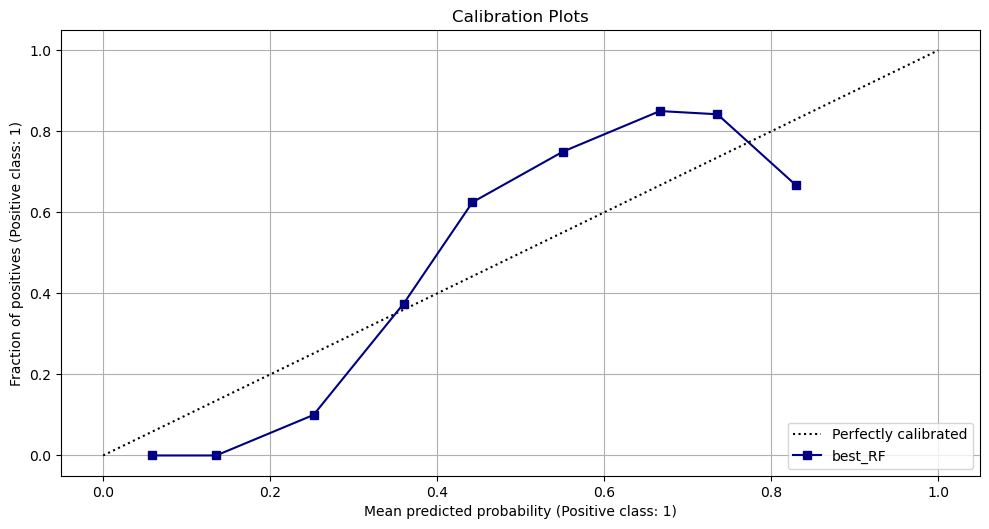

In [21]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
import numpy as np
import random

# Set random seeds for reproducibility
np.random.seed(321)
random.seed(321)

# Create a figure and a grid of subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)

# Create a subplot for the calibration curves
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration Plots")

# Assume clf_list and clf_1_list are lists of (classifier, name) tuples
combined_clf_list = list(clf_1_list)  # Merge the classifier lists

# Define a list of colors
colors = ["navy", "darkorange", "red", "green", "pink", "blue", "purple", "yellow", "cyan", "magenta", "brown", "olive", "teal"]

# Plot the calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the classifier
    color = colors[i % len(colors)]  # Cycle through the colors
    display = CalibrationDisplay.from_estimator(
        clf,  # Classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=color
    )

plt.tight_layout()
#plt.savefig("CalibrationPlots1.pdf")  # Save as PDF (optional)
plt.show()  # Display the plot


Model: RF, Trained model: RandomForestClassifier(random_state=9999)


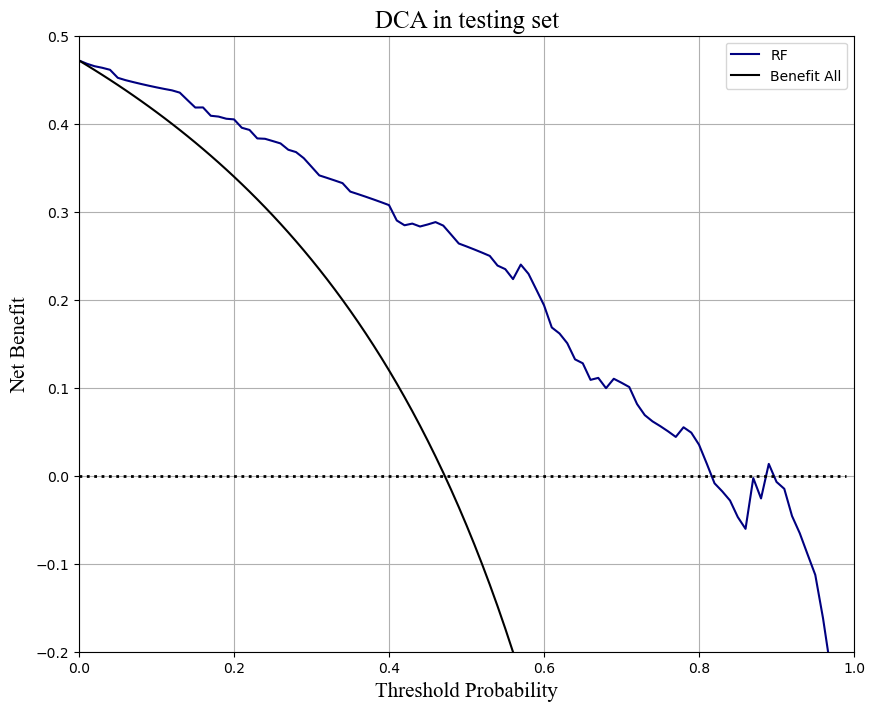

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
plt.figure(figsize=(10, 8))
np.random.seed(321)
random.seed(321)
models = [
    ("RF", rf),
] 


def net_benefit_model(test_y,y_prob,thresh_group):
    net_model = np.array([])
    for thresh in thresh_group:
        y_pred = y_prob > thresh
        tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
        n=len(test_y)
        net_benefit = (tp / n) - (fp / n) * (thresh / (1 - thresh))
        net_model = np.append(net_model,net_benefit)
    return net_model


def net_benefit_all(test_y,thresh_group):
    tn, fp, fn, tp = confusion_matrix(test_y,test_y).ravel()
    total = tp + tn
    net_all = np.array([])
    for thresh in thresh_group:
        net_benefit = (tp / total) - (tn / total) * (thresh / (1 - thresh))
        net_all = np.append(net_all, net_benefit)
    return net_all
 
thresh_group = []
for i in range(0,100,1):
    thresh = i/100
    thresh_group.append(thresh)
 
color = ["navy","darkorange", "red", "green", "pink", "blue", "purple", "cyan", "magenta", "brown", "olive", "teal"]
a = 0
benefit_all = net_benefit_all(test_y,thresh_group)
benefit_models = []
y2 = np.maximum(benefit_all, 0)
plt.xlim(0,1)
 
for name, model in models:
    clf = model.fit(train_X, train_y)
    print(f"Model: {name}, Trained model: {clf}")
    y_prob = clf.predict_proba(test_X)[:, 1]
    benefit_model = net_benefit_model(test_y, y_prob, thresh_group)
    plt.plot(thresh_group, benefit_model, color=color[a], label=name)
    a += 1
    benefit_models.append(benefit_model)

 
plt.plot(thresh_group, benefit_all, color='black', label='Benefit All')
plt.plot(thresh_group, np.zeros(len(thresh_group)), color='k', lw=2, linestyle=':')

plt.ylim(-0.2, 0.5)  # Adjusts the y-axis range
plt.xlabel('Threshold Probability', fontdict={'family': 'Times New Roman', 'fontsize': 15})
plt.ylabel('Net Benefit', fontdict={'family': 'Times New Roman', 'fontsize': 15})
plt.title('DCA in testing set', fontdict={'family': 'Times New Roman', 'fontsize': 18, 'stretch': 'expanded'})
plt.grid('major')
plt.legend(loc='upper right')
plt.show()


In [ ]:
#Don't forget the DCA curve 
#The DCA curve also needs to look good

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Define the parameter grid for grid search (modify as needed)
param_grid = {
    'n_estimators': [100,150,200],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [30, 35, 40],
    'min_samples_split': [40,50,60,70],
}

# Initialize the RandomForestClassifier (without predefined parameters)
rf = RandomForestClassifier(random_state=9999)

# Initialize the GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data (replace train_X and train_y with your features and target variable)
grid_search.fit(train_X, train_y)

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_rf, train_X, train_y, cv=10, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-validation accuracy scores: ", cv_scores[:5])
print("Mean cross-validation accuracy: ", cv_scores[:5].mean())

Best parameters found:  {'max_depth': 4, 'min_samples_leaf': 30, 'min_samples_split': 40, 'n_estimators': 100}
Cross-validation accuracy scores:  [0.85294118 0.79411765 0.79411765 0.78787879 0.78787879]
Mean cross-validation accuracy:  0.8033868092691622


In [ ]:
#..........

In [ ]:
# After multiple rounds of adjustments, 
# the final model will have an aesthetically pleasing calibration curve, 
# with other metrics falling within acceptable ranges. 
# There will certainly be other optimal hyperparameters, 
# but due to time constraints, achieving a satisfactory result is sufficient.

In [ ]:
# In our study, we selected the following hyperparameters to build the RF model, 
# which shows a well-fitted calibration curve on the testing set.

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf_params = {
    'n_estimators': 210,
    'random_state':9999,
    'max_depth':3,
    'min_samples_leaf':34,
    'min_samples_split':70,
}



best_RF = RandomForestClassifier(**rf_params)


best_RF.fit(train_X, train_y)
RF_y_pred = best_RF.predict(test_X)
accuracy = accuracy_score(test_y, RF_y_pred)
print("Test Accuracy with Best Parameters:", accuracy)

Test Accuracy with Best Parameters: 0.795774647887324


In [223]:
accuracy = accuracy_score(test_y,  RF_y_pred)
RF_y_score = best_RF.predict_proba(test_X)[:, 1]
fprrf,tprrf,threshold = roc_curve(test_y,RF_y_score)
auc(fprrf,tprrf)

0.8803980099502487

In [224]:
import numpy as np  
from sklearn import metrics  
from sklearn.metrics import roc_curve, auc  
  
# Calculate the ROC curve and AUC for the original data
fprrf, tprrf, thresholds = roc_curve(test_y, RF_y_score)  
original_auc = auc(fprrf, tprrf)  
print("Original AUC: {:.3f}".format(original_auc))
  
# Bootstrapping parameters  
n_bootstraps = 1000  # Adjust this number as needed  
auc_scores = []  
  
# Bootstrapping process  
np.random.seed(321)  # Set the random seed for reproducibility  
for _ in range(n_bootstraps):  
    # Randomly sample with replacement from the test set
    bootstrap_indices = np.random.randint(0, len(test_y), size=len(test_y))  
    bootstrap_y = test_y[bootstrap_indices]  
    bootstrap_y_score = RF_y_score[bootstrap_indices]  
      
    # Calculate the AUC for each bootstrap sample
    fpr_bootstrap, tpr_bootstrap, _ = roc_curve(bootstrap_y, bootstrap_y_score)  
    auc_bootstrap = auc(fpr_bootstrap, tpr_bootstrap)  
    auc_scores.append(auc_bootstrap)  
  
# Calculate the 95% confidence interval
auc_scores = np.array(auc_scores)  
auc_scores_sorted = np.sort(auc_scores)  
n = len(auc_scores)  
lower_idx = int(np.round(n * 0.025))  # Calculate the lower bound index  
upper_idx = int(np.round(n * 0.975))  # Calculate the upper bound index  
auc_lower = auc_scores_sorted[lower_idx]  
auc_upper = auc_scores_sorted[upper_idx]  
  
print("Test set 95% CI for AUC: ({:.3f}, {:.3f})".format(auc_lower, auc_upper))


Original AUC: 0.880
Test set 95% CI for AUC: (0.824, 0.941)


In [225]:
from sklearn.metrics import roc_auc_score, roc_curve
RF_train_y_pred = best_RF.predict(train_X)
train_y_prob = best_RF.predict_proba(train_X)[:, 1]

# AUC
train_auc = roc_auc_score(train_y, train_y_prob)
# Train AUC  
fprRF, tprRF, thresholds = roc_curve(train_y,train_y_prob)  
original_auc = auc(fprRF, tprRF)  
print("Original AUC: {:.3f}".format(original_auc))

Original AUC: 0.916


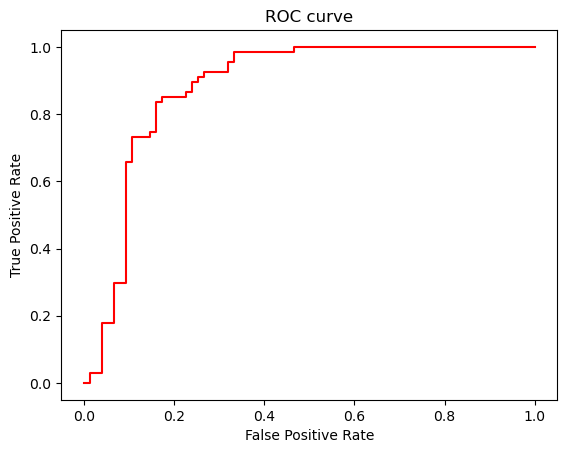

In [226]:
plt.figure()
#plt.plot(fpr, tpr, color='b')  
plt.plot(fprrf,tprrf, color='red')  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC curve')  
plt.show()    

In [227]:
import numpy as np  
from sklearn.metrics import roc_curve, auc  
  
# Calculate the original AUC
fprRF, tprRF, thresholds = roc_curve(train_y, train_y_prob)  
original_auc = auc(fprRF, tprRF)  
print("Original AUC: {:.3f}".format(original_auc))
  
# Bootstrapping parameters  
n_bootstraps = 1000  # Adjust this number as needed  
auc_scores = []  
  
# Bootstrapping process  
np.random.seed(321)  # Set the random seed for reproducibility  
for _ in range(n_bootstraps):  
    # Randomly sample with replacement from the training set
    bootstrap_indices = np.random.randint(0, len(train_y), size=len(train_y))  
    bootstrap_y = train_y[bootstrap_indices]  
    bootstrap_y_score = train_y_prob[bootstrap_indices]  
      
    # Calculate the AUC for each bootstrap sample
    fpr_bootstrap, tpr_bootstrap, _ = roc_curve(bootstrap_y, bootstrap_y_score)  
    auc_bootstrap = auc(fpr_bootstrap, tpr_bootstrap)  
    auc_scores.append(auc_bootstrap)  
  
# Calculate the 95% confidence interval
auc_scores = np.array(auc_scores)  
auc_scores_sorted = np.sort(auc_scores)  
n = len(auc_scores)  
lower_idx = int(np.round(n * 0.025))  # Calculate the lower bound index  
upper_idx = int(np.round(n * 0.975))  # Calculate the upper bound index  
auc_lower = auc_scores_sorted[lower_idx]  
auc_upper = auc_scores_sorted[upper_idx]  
  
print("Training set 95% CI for AUC: ({:.3f}, {:.3f})".format(auc_lower, auc_upper))


Original AUC: 0.916
Training set 95% CI for AUC: (0.884, 0.943)


In [228]:
# Training、testing set metrics
sensitivity_train, specificity_train, ppv_train, npv_train, predictive_accuracy_train, mcc_train = calculate_metrics(train_y,RF_train_y_pred)
sensitivity_test, specificity_test, ppv_test, npv_test, predictive_accuracy_test, mcc_test = calculate_metrics(test_y, RF_y_pred)

# print
print("Train Set Metrics:")
print(f"Sensitivity: {sensitivity_train:.3f}")
print(f"Specificity: {specificity_train:.3f}")
print(f"PPV (Precision): {ppv_train:.3f}")
print(f"NPV: {npv_train:.3f}")
print(f"Predictive Accuracy: {predictive_accuracy_train:.3f}")
print(f"MCC: {mcc_train:.3f}")

print("\nTest Set Metrics:")
print(f"Sensitivity: {sensitivity_test:.3f}")
print(f"Specificity: {specificity_test:.3f}")
print(f"PPV (Precision): {ppv_test:.3f}")
print(f"NPV: {npv_test:.3f}")
print(f"Predictive Accuracy: {predictive_accuracy_test:.3f}")
print(f"MCC: {mcc_test:.3f}")

Train Set Metrics:
Sensitivity: 0.823
Specificity: 0.844
PPV (Precision): 0.807
NPV: 0.858
Predictive Accuracy: 0.835
MCC: 0.666

Test Set Metrics:
Sensitivity: 0.746
Specificity: 0.840
PPV (Precision): 0.806
NPV: 0.787
Predictive Accuracy: 0.796
MCC: 0.590


Train AUC： 0.915697461780411


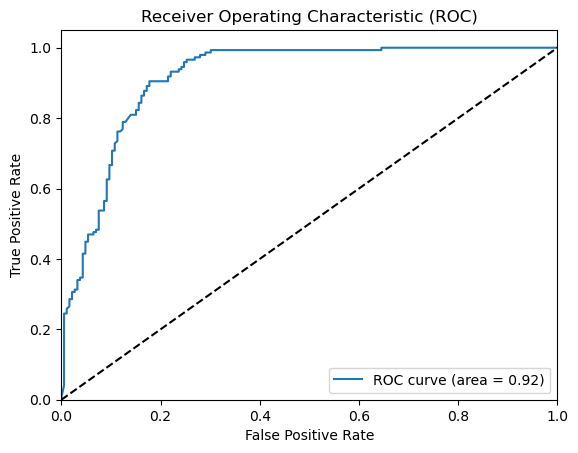

In [229]:
train_auc = roc_auc_score(train_y, train_y_prob)
print("Train AUC：", train_auc)


fpr, tpr, thresholds = roc_curve(train_y, train_y_prob)
plt.plot(fprRF, tprRF, label='ROC curve (area = %0.2f)' % train_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [230]:
import numpy as np  
from scipy.stats import chi2_contingency  

def hosmer_lemeshow_test(test_y, RF_y_pred, num_groups=10):  
    # Sort the data based on predicted probabilities  
    sorted_indices = np.argsort(RF_y_pred)  
    sorted_y = test_y[sorted_indices]  
    
    # Create groups based on the sorted indices  
    group_size = len(sorted_y) // num_groups  
    group_bounds = np.arange(0, len(sorted_y) + 1, group_size)  
    
    # Calculate observed and expected counts for each group  
    observed_counts = np.zeros(num_groups)  
    expected_counts = np.zeros(num_groups)  
    
    total_positive = np.sum(sorted_y)  
    total_negative = len(sorted_y) - total_positive  
    
    for i in range(num_groups):  
        start, end = group_bounds[i], group_bounds[i + 1]  
        observed_counts[i] = np.sum(sorted_y[start:end])  
        expected_counts[i] = (end - start) * total_positive / len(sorted_y)  
        
    # Perform chi-squared test  
    chi2, p = chi2_contingency(np.array([observed_counts, expected_counts]).T)[:2]  
    
    dof = num_groups - 2  # Degrees of freedom for chi-squared test
      
    return chi2, p, dof  

chi2, p_value, dof = hosmer_lemeshow_test(test_y,RF_y_pred)  
print(f"Chi-squared: {chi2}")  
print(f"P-value: {p_value}")  
print(f"Degrees of freedom: {dof}")

# Determine model calibration based on P-value
if p_value < 0.05:
    print("Model calibration is poor")
else:
    print("Model calibration is good")

Chi-squared: 12.431163258692122
P-value: 0.1900789131095703
Degrees of freedom: 8
Model calibration is good


In [231]:
clf_1_list = [
    (best_RF, "best_RF"),
]

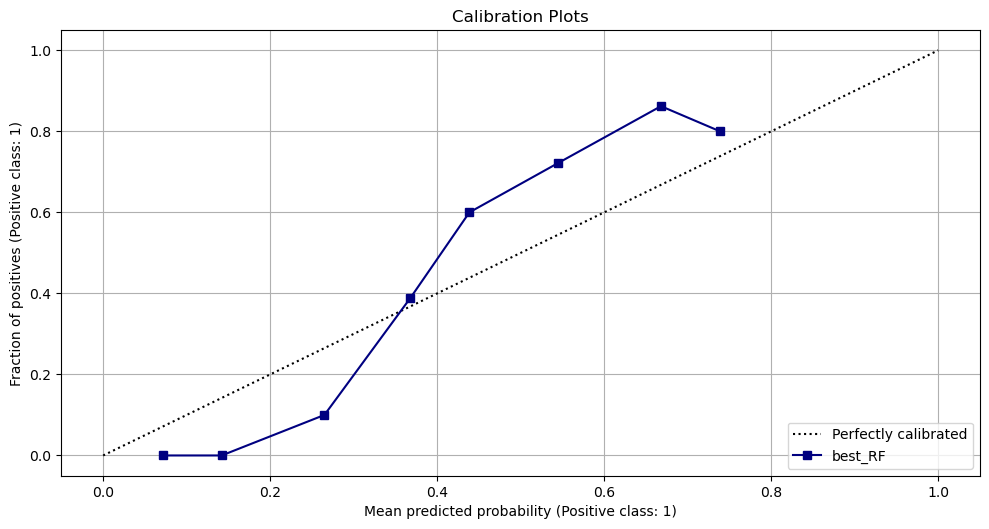

In [232]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
import numpy as np
import random

# Set random seeds for reproducibility
np.random.seed(321)
random.seed(321)

# Create a figure and a grid of subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)

# Create a subplot for the calibration curves
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration Plots")

# Assume clf_list and clf_1_list are lists of (classifier, name) tuples
combined_clf_list = list(clf_1_list)  # Merge the classifier lists

# Define a list of colors
colors = ["navy", "darkorange", "red", "green", "pink", "blue", "purple", "yellow", "cyan", "magenta", "brown", "olive", "teal"]

# Plot the calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the classifier
    color = colors[i % len(colors)]  # Cycle through the colors
    display = CalibrationDisplay.from_estimator(
        clf,  # Classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=color
    )

plt.tight_layout()
#plt.savefig("CalibrationPlots1.pdf")  # Save as PDF (optional)
plt.show()  # Display the plot


In [233]:
RF_y_pred =  best_RF.predict(test_X)


Model: best_RF, Trained model: RandomForestClassifier(max_depth=3, min_samples_leaf=34, min_samples_split=70,
                       n_estimators=210, random_state=9999)


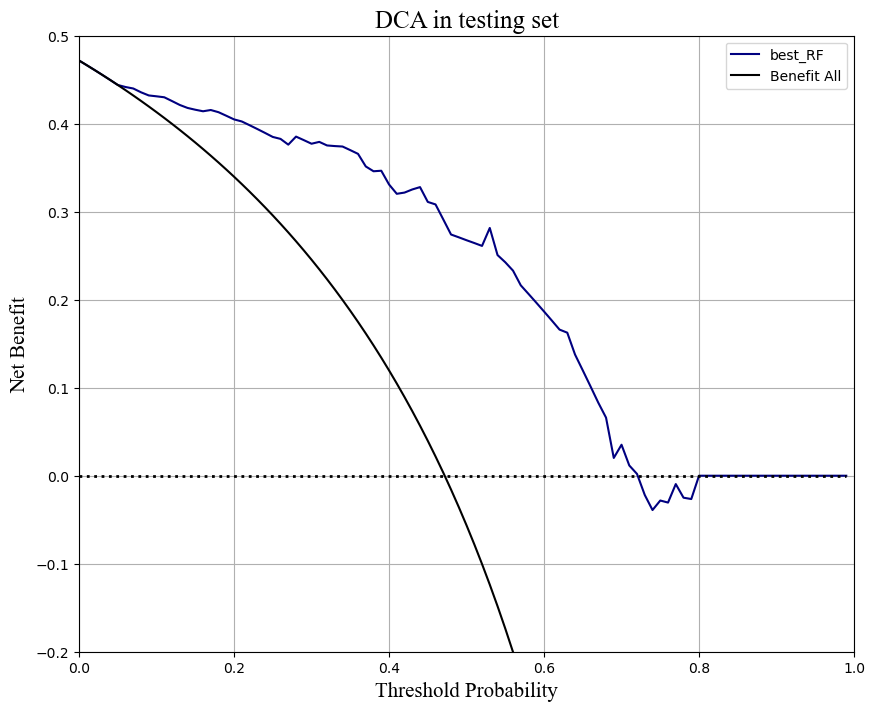

In [234]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
plt.figure(figsize=(10, 8))
np.random.seed(321)
random.seed(321)
models = [
    ("best_RF", best_RF),
] 


def net_benefit_model(test_y,y_prob,thresh_group):
    net_model = np.array([])
    for thresh in thresh_group:
        y_pred = y_prob > thresh
        tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
        n=len(test_y)
        net_benefit = (tp / n) - (fp / n) * (thresh / (1 - thresh))
        net_model = np.append(net_model,net_benefit)
    return net_model


def net_benefit_all(test_y,thresh_group):
    tn, fp, fn, tp = confusion_matrix(test_y,test_y).ravel()
    total = tp + tn
    net_all = np.array([])
    for thresh in thresh_group:
        net_benefit = (tp / total) - (tn / total) * (thresh / (1 - thresh))
        net_all = np.append(net_all, net_benefit)
    return net_all
 
thresh_group = []
for i in range(0,100,1):
    thresh = i/100
    thresh_group.append(thresh)
 
color = ["navy","darkorange", "red", "green", "pink", "blue", "purple", "cyan", "magenta", "brown", "olive", "teal"]
a = 0
benefit_all = net_benefit_all(test_y,thresh_group)
benefit_models = []
y2 = np.maximum(benefit_all, 0)
plt.xlim(0,1)
 
for name, model in models:
    clf = model.fit(train_X, train_y)
    print(f"Model: {name}, Trained model: {clf}")
    y_prob = clf.predict_proba(test_X)[:, 1]
    benefit_model = net_benefit_model(test_y, y_prob, thresh_group)
    plt.plot(thresh_group, benefit_model, color=color[a], label=name)
    a += 1
    benefit_models.append(benefit_model)

 
plt.plot(thresh_group, benefit_all, color='black', label='Benefit All')
plt.plot(thresh_group, np.zeros(len(thresh_group)), color='k', lw=2, linestyle=':')

plt.ylim(-0.2, 0.5)  # Adjusts the y-axis range
plt.xlabel('Threshold Probability', fontdict={'family': 'Times New Roman', 'fontsize': 15})
plt.ylabel('Net Benefit', fontdict={'family': 'Times New Roman', 'fontsize': 15})
plt.title('DCA in testing set', fontdict={'family': 'Times New Roman', 'fontsize': 18, 'stretch': 'expanded'})
plt.grid('major')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# That's all for Random Forest. Thanks for watching.